In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
database_name = 'telecom'
table_name = 'xdr_data'

In [4]:
connection_params = {'host': 'localhost', 'user': 'postgres',
                         'password': 'Postgresql', 'port': "5432",
                         'database': database_name }

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")


In [5]:

# str or SQLAlchemy Select table (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)

In [6]:
df.shape

(150001, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Task 2 - User overview analysis
For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [9]:
def top_10_handsets(data):
    data['Handset Type'].value_counts()[:10].plot.bar(figsize=(10, 5))
    plt.title(f'Top 10 Handsets used by the customers', size=15, fontweight='bold')
    plt.xlabel("Handsets Type", size=18); plt.ylabel("Usage Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def top_3_manufacturers(data):
    data['Handset Manufacturer'].value_counts()[:3].plot.bar()
    plt.title(f'Top 3 Handset Manufacturers', fontweight= 'bold')
    plt.xlabel("Handset Manufacturers"); 
    plt.ylabel("Frequency");
    plt.show()

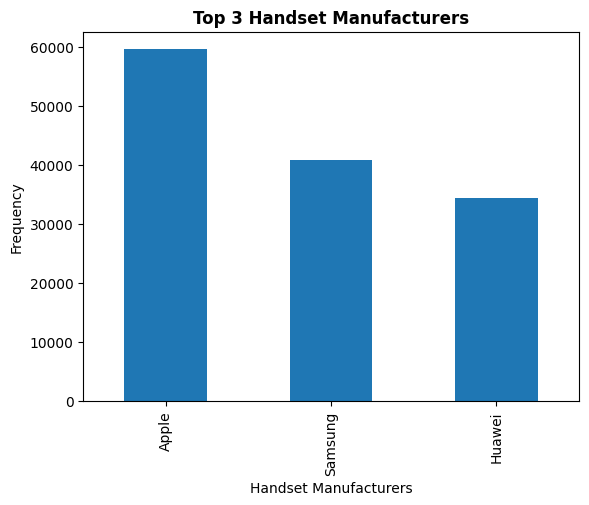

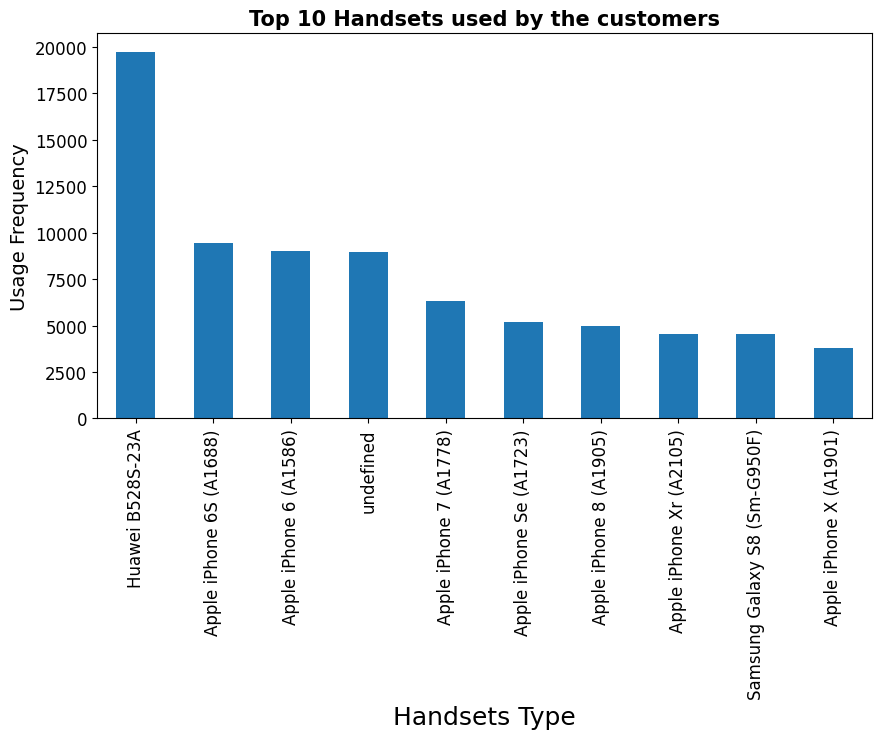

In [10]:
top_3_manufacturers(df)
top_10_handsets(df)

Task 2.1 - Your employer wants to have an overview of the users’ behaviour on those applications.   
- Aggregate per user the following information in the column  
- - number of xDR sessions
- - Session duration
- - the total download (DL) and upload (UL) data
- - the total data volume (in Bytes) during this session for each application


### Handling Missing Values

In [ ]:
df.isnull().sum()

: 

In [ ]:
# How many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing (df):
    # calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # count the number of missing values per column
    missingCount = df.isnull().sum()

    # Calcualte total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    missingPercentage = round(((totalMissing/totalCells)*100), 2)
    #print(f"The Telecom database contains {missingPercentage}% missing values")
    return missingPercentage

print(f"The Telecom database contains {percent_missing (df)}% missing values")

: 

#### Let's work on the missing values by evaluating the percentage of each feature. After that, order them. Finally, remove the ones above `12%`

In [ ]:
# converting the columns of our data into a list.
missing = []
col = df.columns.tolist()
# add corresponding feature and missing value percentage into missing[]
for i in col:
    missing.append((i, percent_missing(df[i])))
    
missing_percent = pd.DataFrame(missing, columns = ['Features', 'MissingPercentage'])
missing_sorted = missing_percent.sort_values(by='MissingPercentage', ascending=False)

# keep usefull columns
useful_columns = missing_sorted[missing_sorted['MissingPercentage']<12]['Features'].tolist()
df = df[useful_columns]
df

: 

In [ ]:
df.isnull().sum()

: 

#### Drop remaining missing values from our data

In [ ]:
df = df.dropna()
df.isnull().sum()

: 

In [ ]:
df.info()

: 

In [ ]:
df.describe()

: 

For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [ ]:
df.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type'].sum()

: 

: 

: 

: 

Task 2.1 - Your employer wants to have an overview of the users’ behaviour on those applications.   
Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


In [ ]:
df.groupby('MSISDN/Number')['IMSI'].sum()

: 

: 